In [1]:
using Plots

include("src/PolyColoid.jl")
using .PolyColoid

In [16]:
coloid = Coloid(144, 4, 1 / √2, (20, 20))
crystal_initialize!(coloid, 12, (20/12, 20/12), (20/24, 20/24))

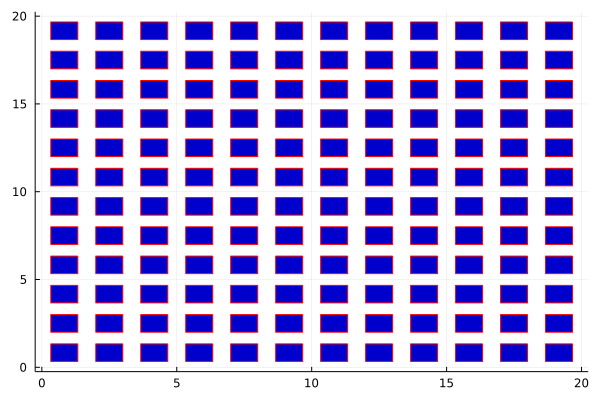

In [17]:
plot(coloid, legend=false)

In [18]:
mcsimulate_periodic!(coloid, 20/24, π/2, 1000)

(0.2450592885375494, 0.8319838056680162)

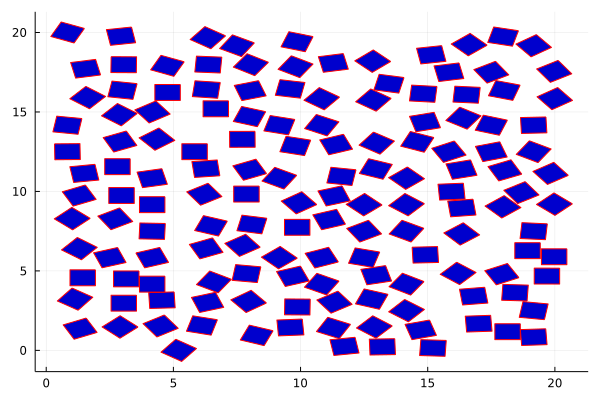

In [19]:
plot(coloid, legend=false)